1. Carga de datos de calidad de aire de ciudades

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/ancona_data.csv', encoding='utf-8')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417626 entries, 0 to 417625
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 417626 non-null  object 
 1   NO2                  409848 non-null  float64
 2   O3                   392823 non-null  float64
 3   PM10                 389767 non-null  float64
 4   PM2.5                372508 non-null  float64
 5   Latitude             417626 non-null  float64
 6   Longitude            417626 non-null  float64
 7   station_name         417626 non-null  object 
 8   Wind-Speed (U)       417626 non-null  float64
 9   Wind-Speed (V)       417626 non-null  float64
 10  Dewpoint Temp        417626 non-null  float64
 11  Soil Temp            417626 non-null  float64
 12  Total Percipitation  417626 non-null  float64
 13  Vegitation (High)    417626 non-null  float64
 14  Vegitation (Low)     417626 non-null  float64
 15  Temp             

In [10]:
df.head()

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,code,id
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.0,3.184390,2.847654,66.075624,85.422435,IT1827A,26
1,2021-09-01 01:00:00,8.000000,NaN,9.000000,NaN,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.0,3.179204,2.851910,67.392994,85.502078,IT0460A,23
2,2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.0,3.176792,2.852830,67.622493,85.500013,ANCCAMS11,39
3,2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.0,3.181947,2.849007,66.453195,85.435906,ANCCAMS08,36
4,2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.0,3.179280,2.852743,67.701531,85.534001,ANCCAMS05,33


2. Eliminar las variables inutiles (out of the scope)

In [11]:
df = df.drop(["code", "station_name","code", "id","Vegitation (High)","Vegitation (Low)"], axis=1)

3. Tratamiento de valores nulos

In [12]:
df.shape

(417626, 14)

In [13]:
df.isnull().sum()

Date                       0
NO2                     7778
O3                     24803
PM10                   27859
PM2.5                  45118
Latitude                   0
Longitude                  0
Wind-Speed (U)             0
Wind-Speed (V)             0
Dewpoint Temp              0
Soil Temp                  0
Total Percipitation        0
Temp                       0
Relative Humidity          0
dtype: int64

Se debe eliminar los nulos de PM10 y PM2.5 ya que no tiene sentido predecir la media de estos valores


In [14]:
df = df.dropna(subset=["PM10", "PM2.5"])

In [15]:
df.isnull().sum()

Date                      0
NO2                    2530
O3                     9626
PM10                      0
PM2.5                     0
Latitude                  0
Longitude                 0
Wind-Speed (U)            0
Wind-Speed (V)            0
Dewpoint Temp             0
Soil Temp                 0
Total Percipitation       0
Temp                      0
Relative Humidity         0
dtype: int64

**Utilicé un método mas manual para reemplazar los NaN por los valores de la media**


In [16]:
def fill_null_with_mean(col):
    mean = np.mean(df[col])
    df[col] = df[col].fillna(mean)

In [17]:
cols_nulls = ["NO2", "O3"]
for col in cols_nulls:
    fill_null_with_mean(col)

In [18]:
df.isnull().sum()

Date                   0
NO2                    0
O3                     0
PM10                   0
PM2.5                  0
Latitude               0
Longitude              0
Wind-Speed (U)         0
Wind-Speed (V)         0
Dewpoint Temp          0
Soil Temp              0
Total Percipitation    0
Temp                   0
Relative Humidity      0
dtype: int64

Transformar tiempo en valores utiles y legibles

In [21]:
df["Date"] = pd.to_datetime(df["Date"])
df["hour"] = df["Date"].dt.hour
df["day_of_week"] = df["Date"].dt.dayofweek
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["season"] = df["Date"].dt.month % 12 // 3 + 1

Borro la columna de Date

In [23]:
df = df.drop("Date", axis=1)

Obtener las columnas numericas

In [24]:
num_cols = list(df.select_dtypes(exclude="object").columns)
num_cols

['NO2',
 'O3',
 'PM10',
 'PM2.5',
 'Latitude',
 'Longitude',
 'Wind-Speed (U)',
 'Wind-Speed (V)',
 'Dewpoint Temp',
 'Soil Temp',
 'Total Percipitation',
 'Temp',
 'Relative Humidity',
 'hour',
 'day_of_week',
 'year',
 'month',
 'season']

In [25]:
num_cols.remove("Longitude")
num_cols.remove("Latitude")

In [27]:
num_cols.remove("hour")
num_cols.remove("day_of_week")
num_cols.remove("year")
num_cols.remove("month")
num_cols.remove("season")

In [28]:
num_cols

['NO2',
 'O3',
 'PM10',
 'PM2.5',
 'Wind-Speed (U)',
 'Wind-Speed (V)',
 'Dewpoint Temp',
 'Soil Temp',
 'Total Percipitation',
 'Temp',
 'Relative Humidity']

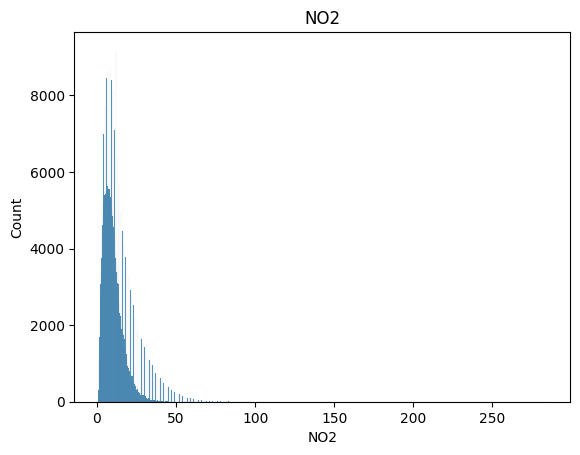

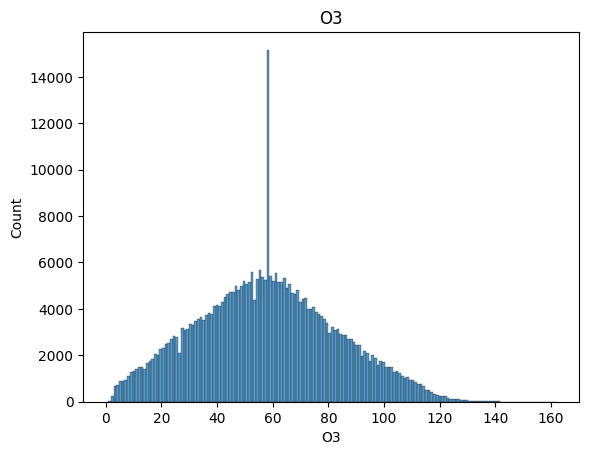

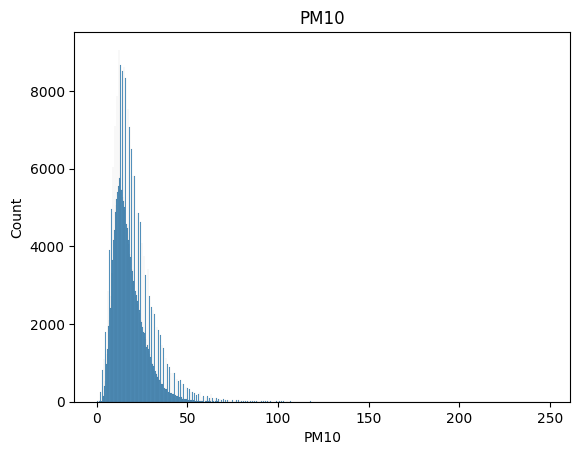

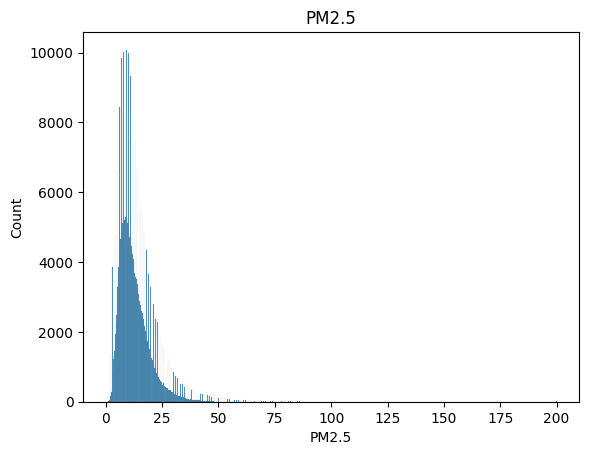

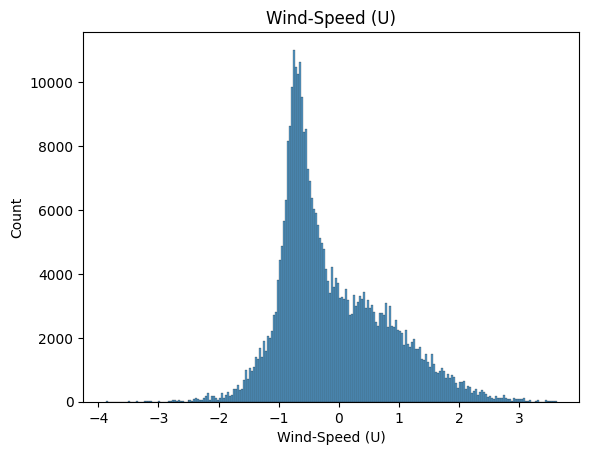

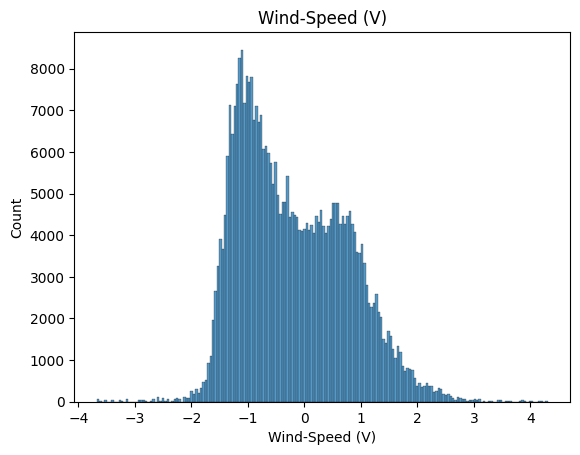

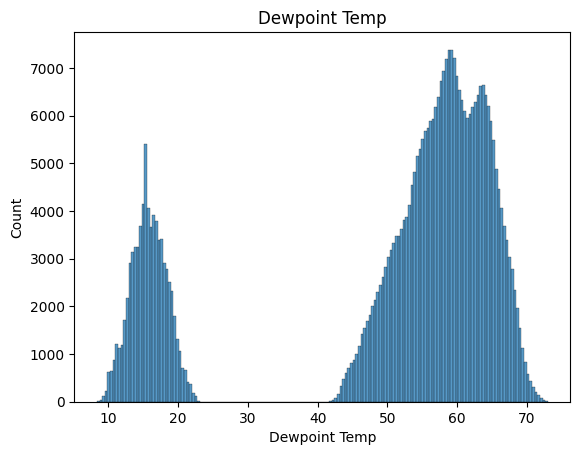

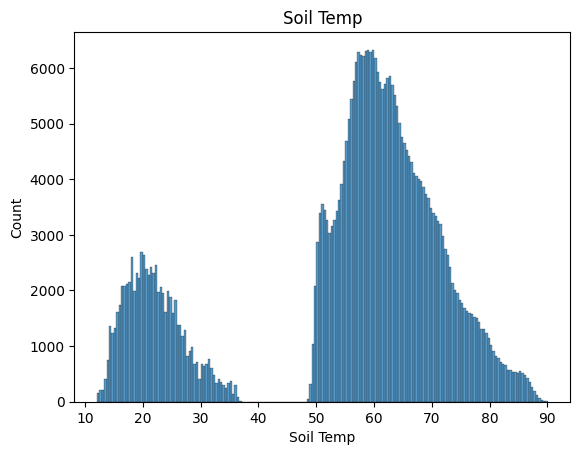

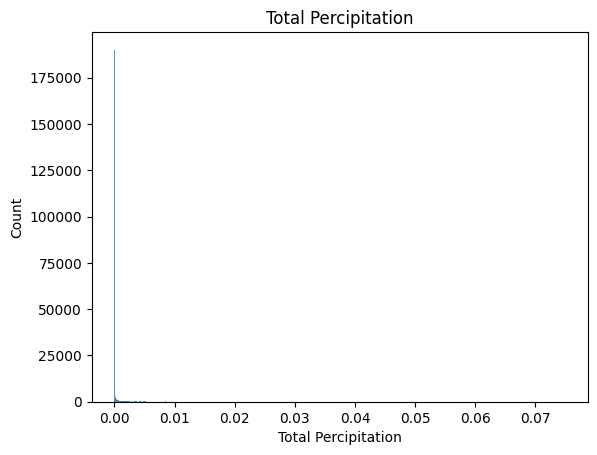

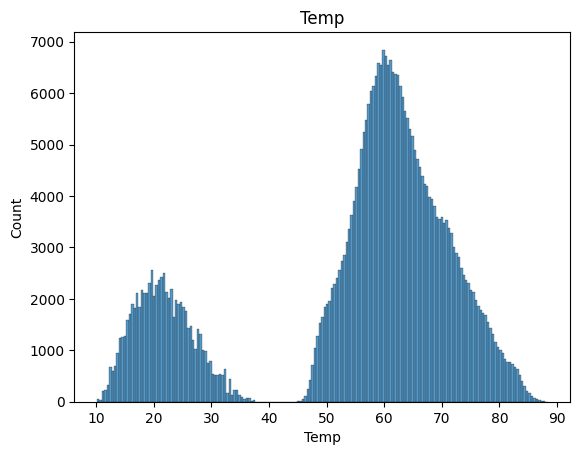

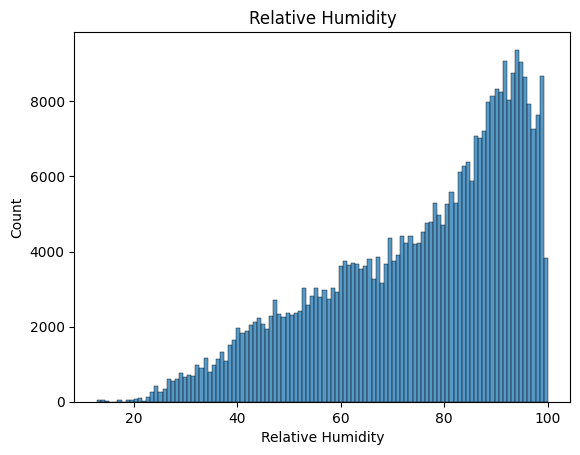

In [29]:
for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col)
    plt.title(col)

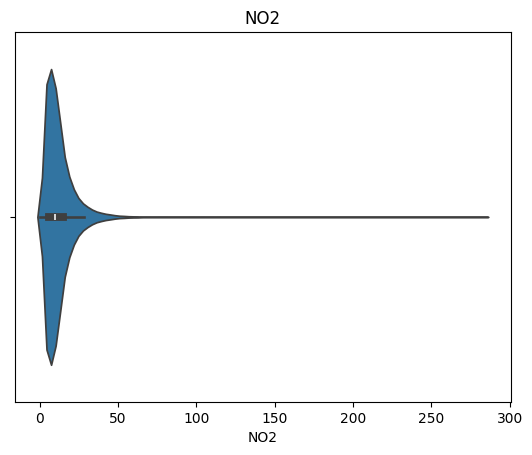

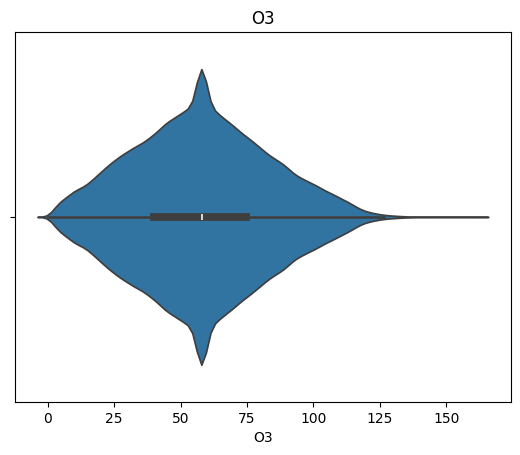

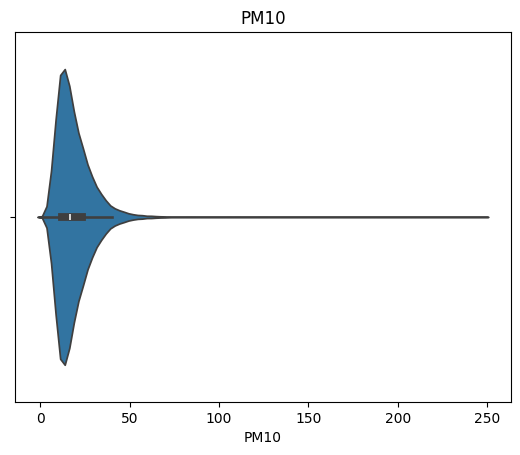

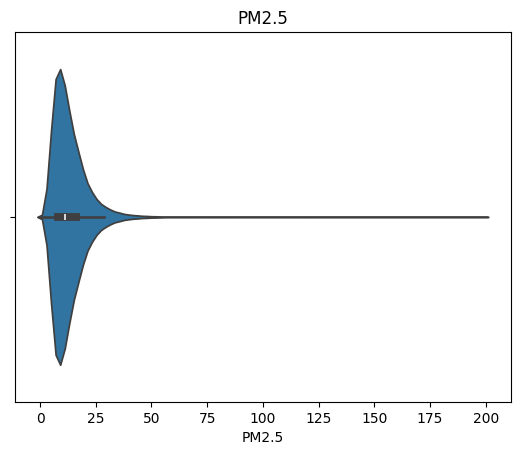

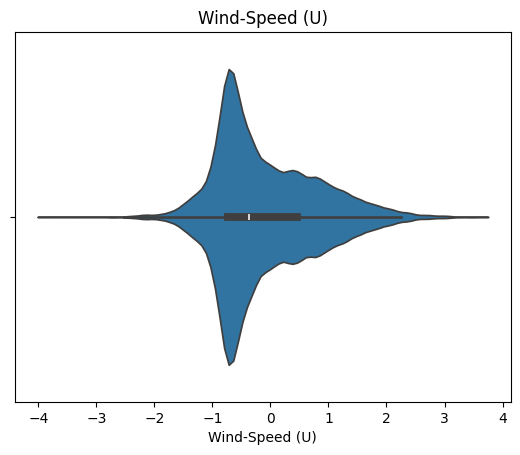

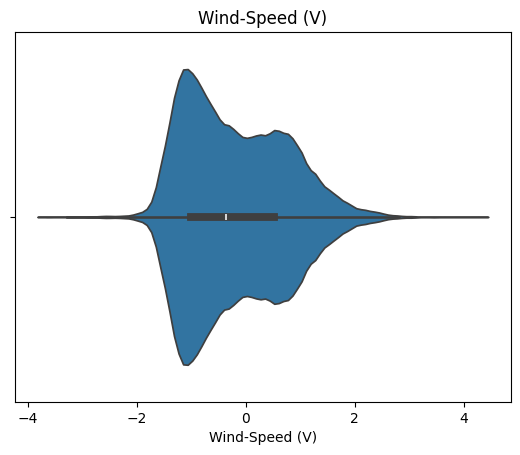

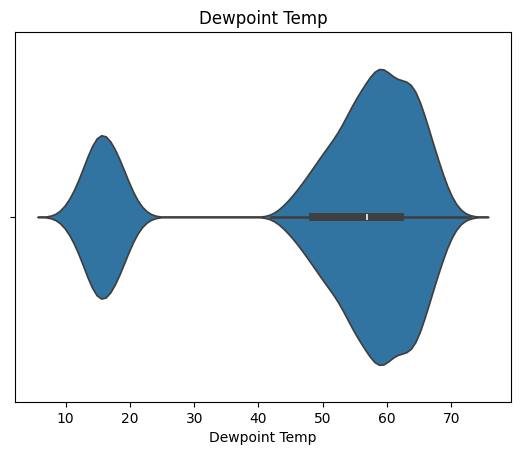

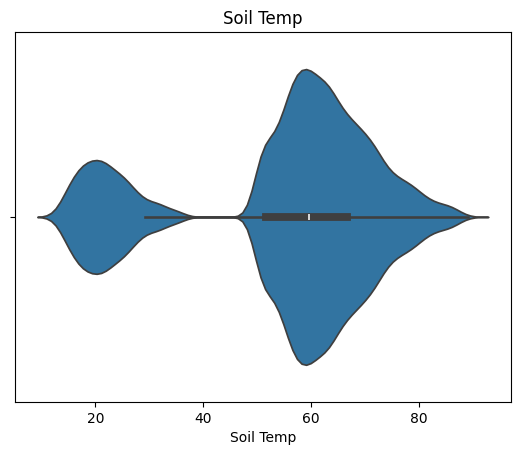

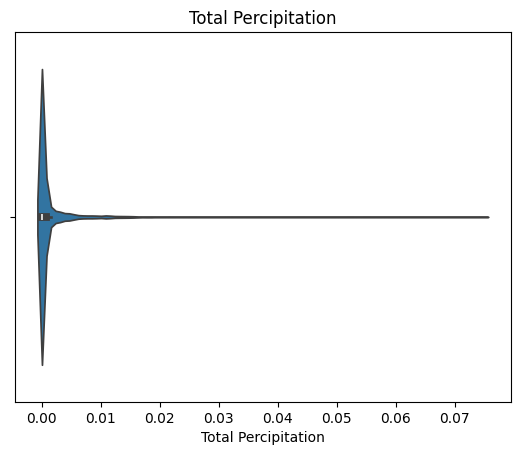

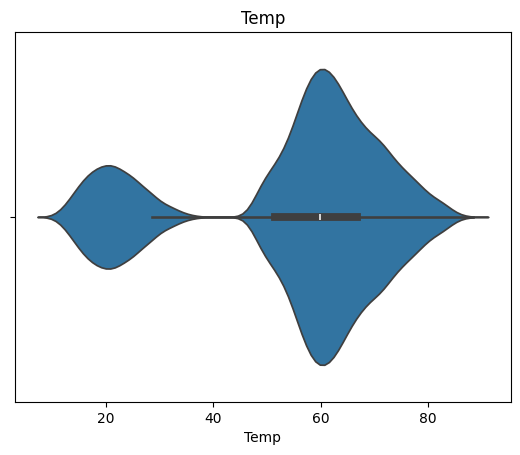

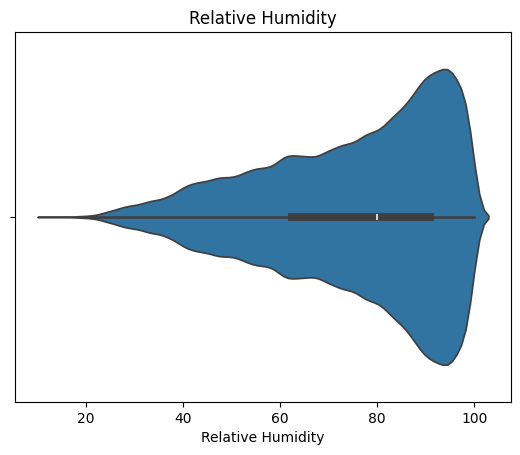

In [30]:
for col in num_cols:
    plt.figure()
    sns.violinplot(data=df, x=col)
    plt.title(col)

Eliminamos valores que esten fuera del rango de 3 dev. standard

In [31]:
def calculate_statiscal_descriptors(df, col):
    mean = np.mean(df[col])
    std = np.std(df[col])
    return mean, std

col_sd = {}
for col in num_cols:
    col_sd[col] = calculate_statiscal_descriptors(df, col)

In [32]:
def remove_outliers(x, mean, std):
    if x < mean - 3 * std:
        return mean - 3 * std
    elif x > mean + 3 * std:
        return mean + 3 * std
    else:
        return x

for col in num_cols:
    mean, std = col_sd[col]
    df[col] = df[col].apply(lambda x: remove_outliers(x, mean, std))

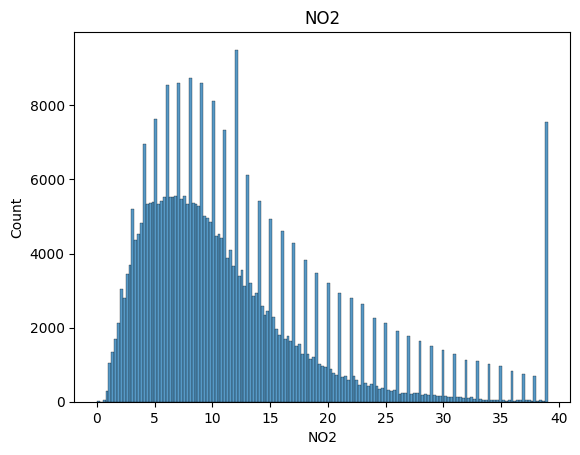

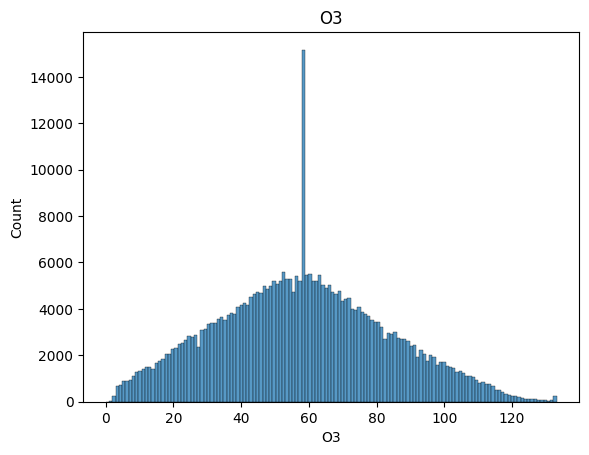

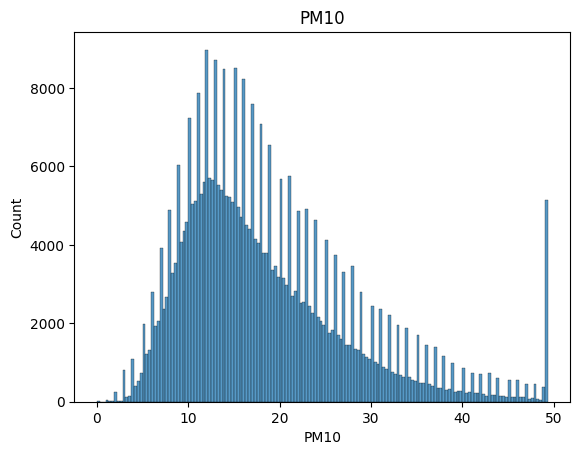

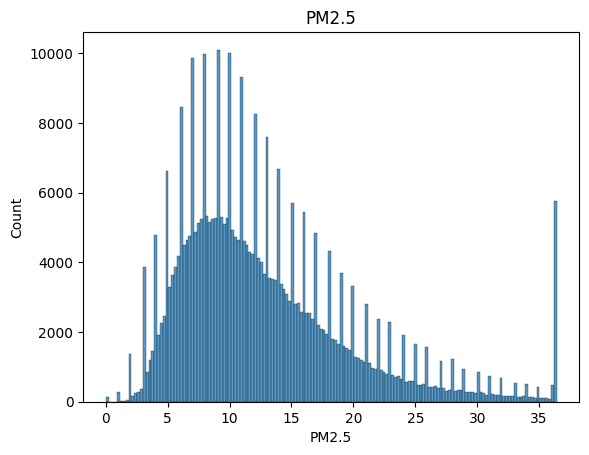

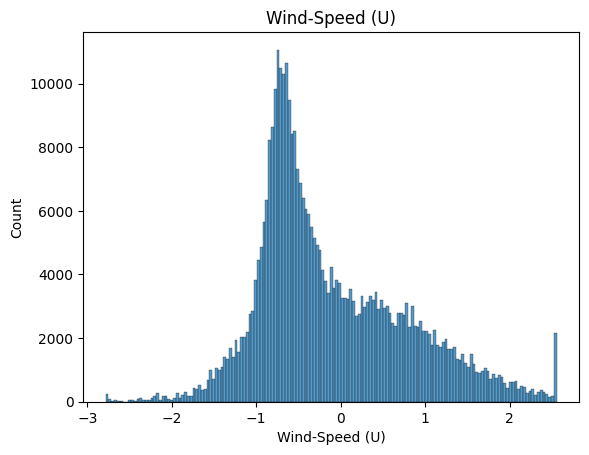

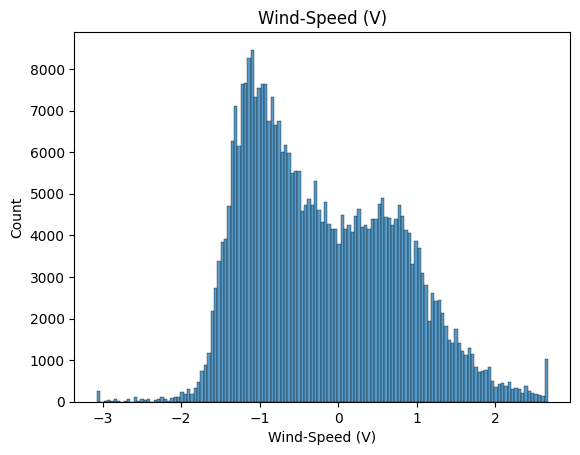

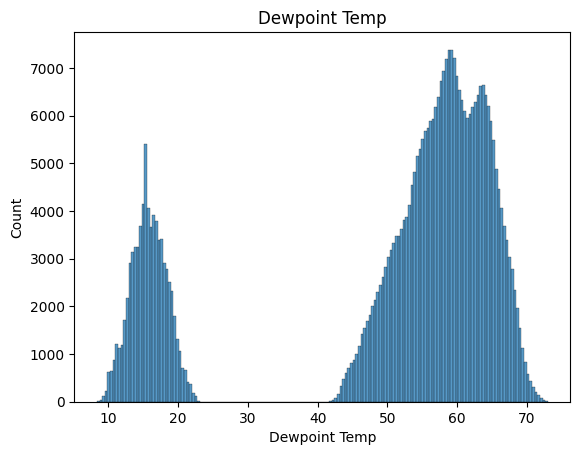

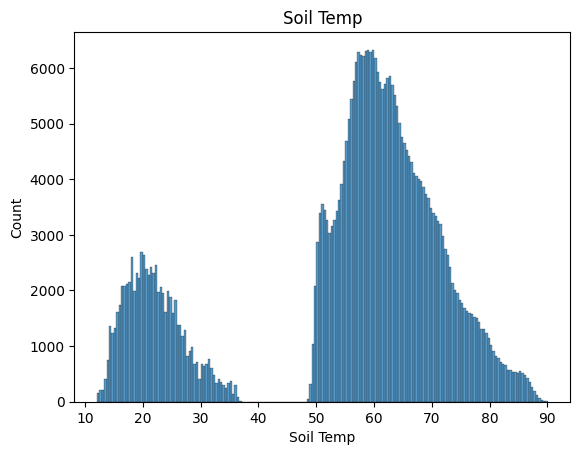

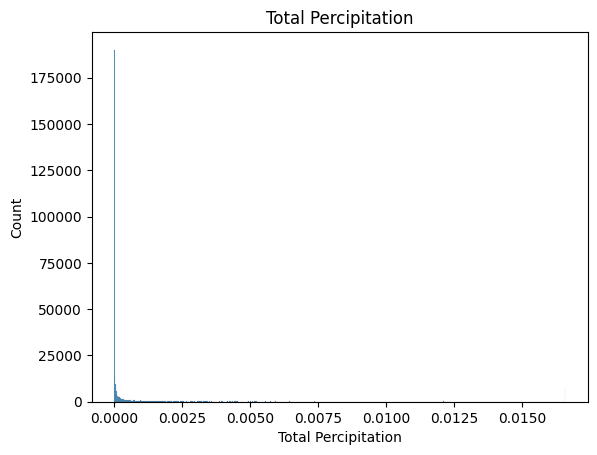

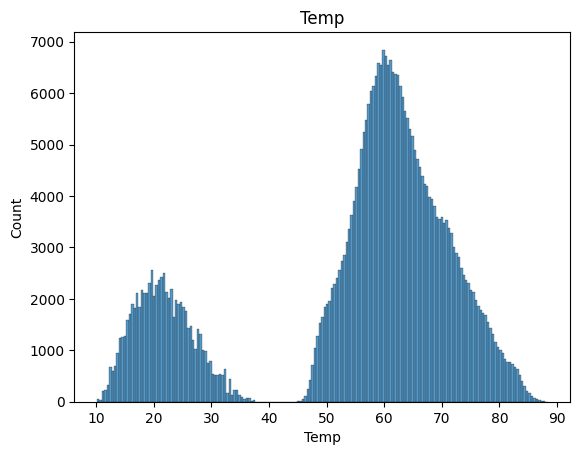

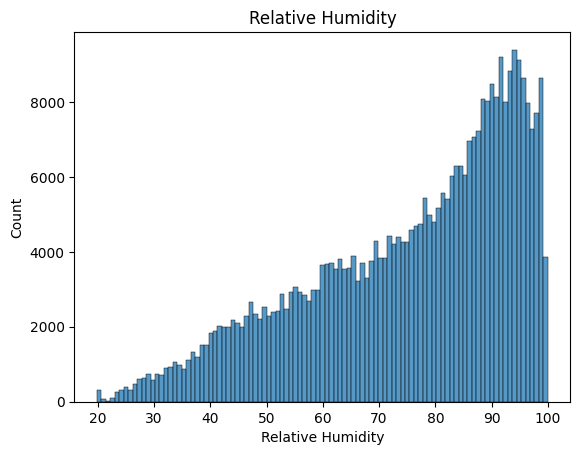

In [33]:
for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col)
    plt.title(col)

Aplicando featuring engineering, vamos a asociar datos de temperatura, viento, tiempo y NO2/O3

In [34]:
df["prom_viento"] = df[["Wind-Speed (U)","Wind-Speed (V)"]].mean(axis=1)
df["ratio_viento"] = df["Wind-Speed (U)"]/df["Wind-Speed (V)"]
df["prom_temp"] = df[["Soil Temp", "Dewpoint Temp","Temp"]].mean(axis=1)
df["ratio_NO2_O3"] = df["O3"]/df["NO2"]
df["prom_NO2_O3"] = df["O3"]*df["NO2"]
df["Prec_Humedad"] = df["Total Percipitation"]*df["Relative Humidity"]
df["location"] = df[["Latitude", "Longitude"]].mean(axis=1)
df["Year_time"] = df[["month", "season"]].mean(axis=1)
df["Year_period"] = df["month"]*df["season"]

In [35]:
df1 = df.copy()

In [36]:
num_cols = list(df1.select_dtypes(exclude="object").columns)
num_cols

['NO2',
 'O3',
 'PM10',
 'PM2.5',
 'Latitude',
 'Longitude',
 'Wind-Speed (U)',
 'Wind-Speed (V)',
 'Dewpoint Temp',
 'Soil Temp',
 'Total Percipitation',
 'Temp',
 'Relative Humidity',
 'hour',
 'day_of_week',
 'year',
 'month',
 'season',
 'prom_viento',
 'ratio_viento',
 'prom_temp',
 'ratio_NO2_O3',
 'prom_NO2_O3',
 'Prec_Humedad',
 'location',
 'Year_time',
 'Year_period']

In [38]:
num_cols.remove("PM10")
num_cols.remove("PM2.5")

In [37]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# define the chi2 test
def chi2_test(data, feature, target):
    # contingency table
    table = pd.crosstab(data[feature], data[target])
    # chi2 test
    stat, p, dof, expected = chi2_contingency(table)
    return p

# define anova test
def anova_test(data, feature, target):
    groups = data.groupby(target)[feature].apply(list)
    stat, p = f_oneway(*groups)
    return p

In [39]:
useful_var_pm10 = []
# aplicamos anova
for col in num_cols:
    p = anova_test(df1, col, "PM10")
    if p < 0.05:
        useful_var_pm10.append(col)

useful_var_pm25 = []
# aplicamos anova
for col in num_cols:
    p = anova_test(df1, col, "PM2.5")
    if p < 0.05:
        useful_var_pm25.append(col)  
# no aplico chi por no tener valores categoricos
"""for col in num_cols:
    p = chi2_test(df, col, "PM10")
    if p < 0.05:
        useful_var.append(col)"""

KeyboardInterrupt: 

In [41]:
df1 = df

In [42]:
matrix = df1.corr()

<Axes: >

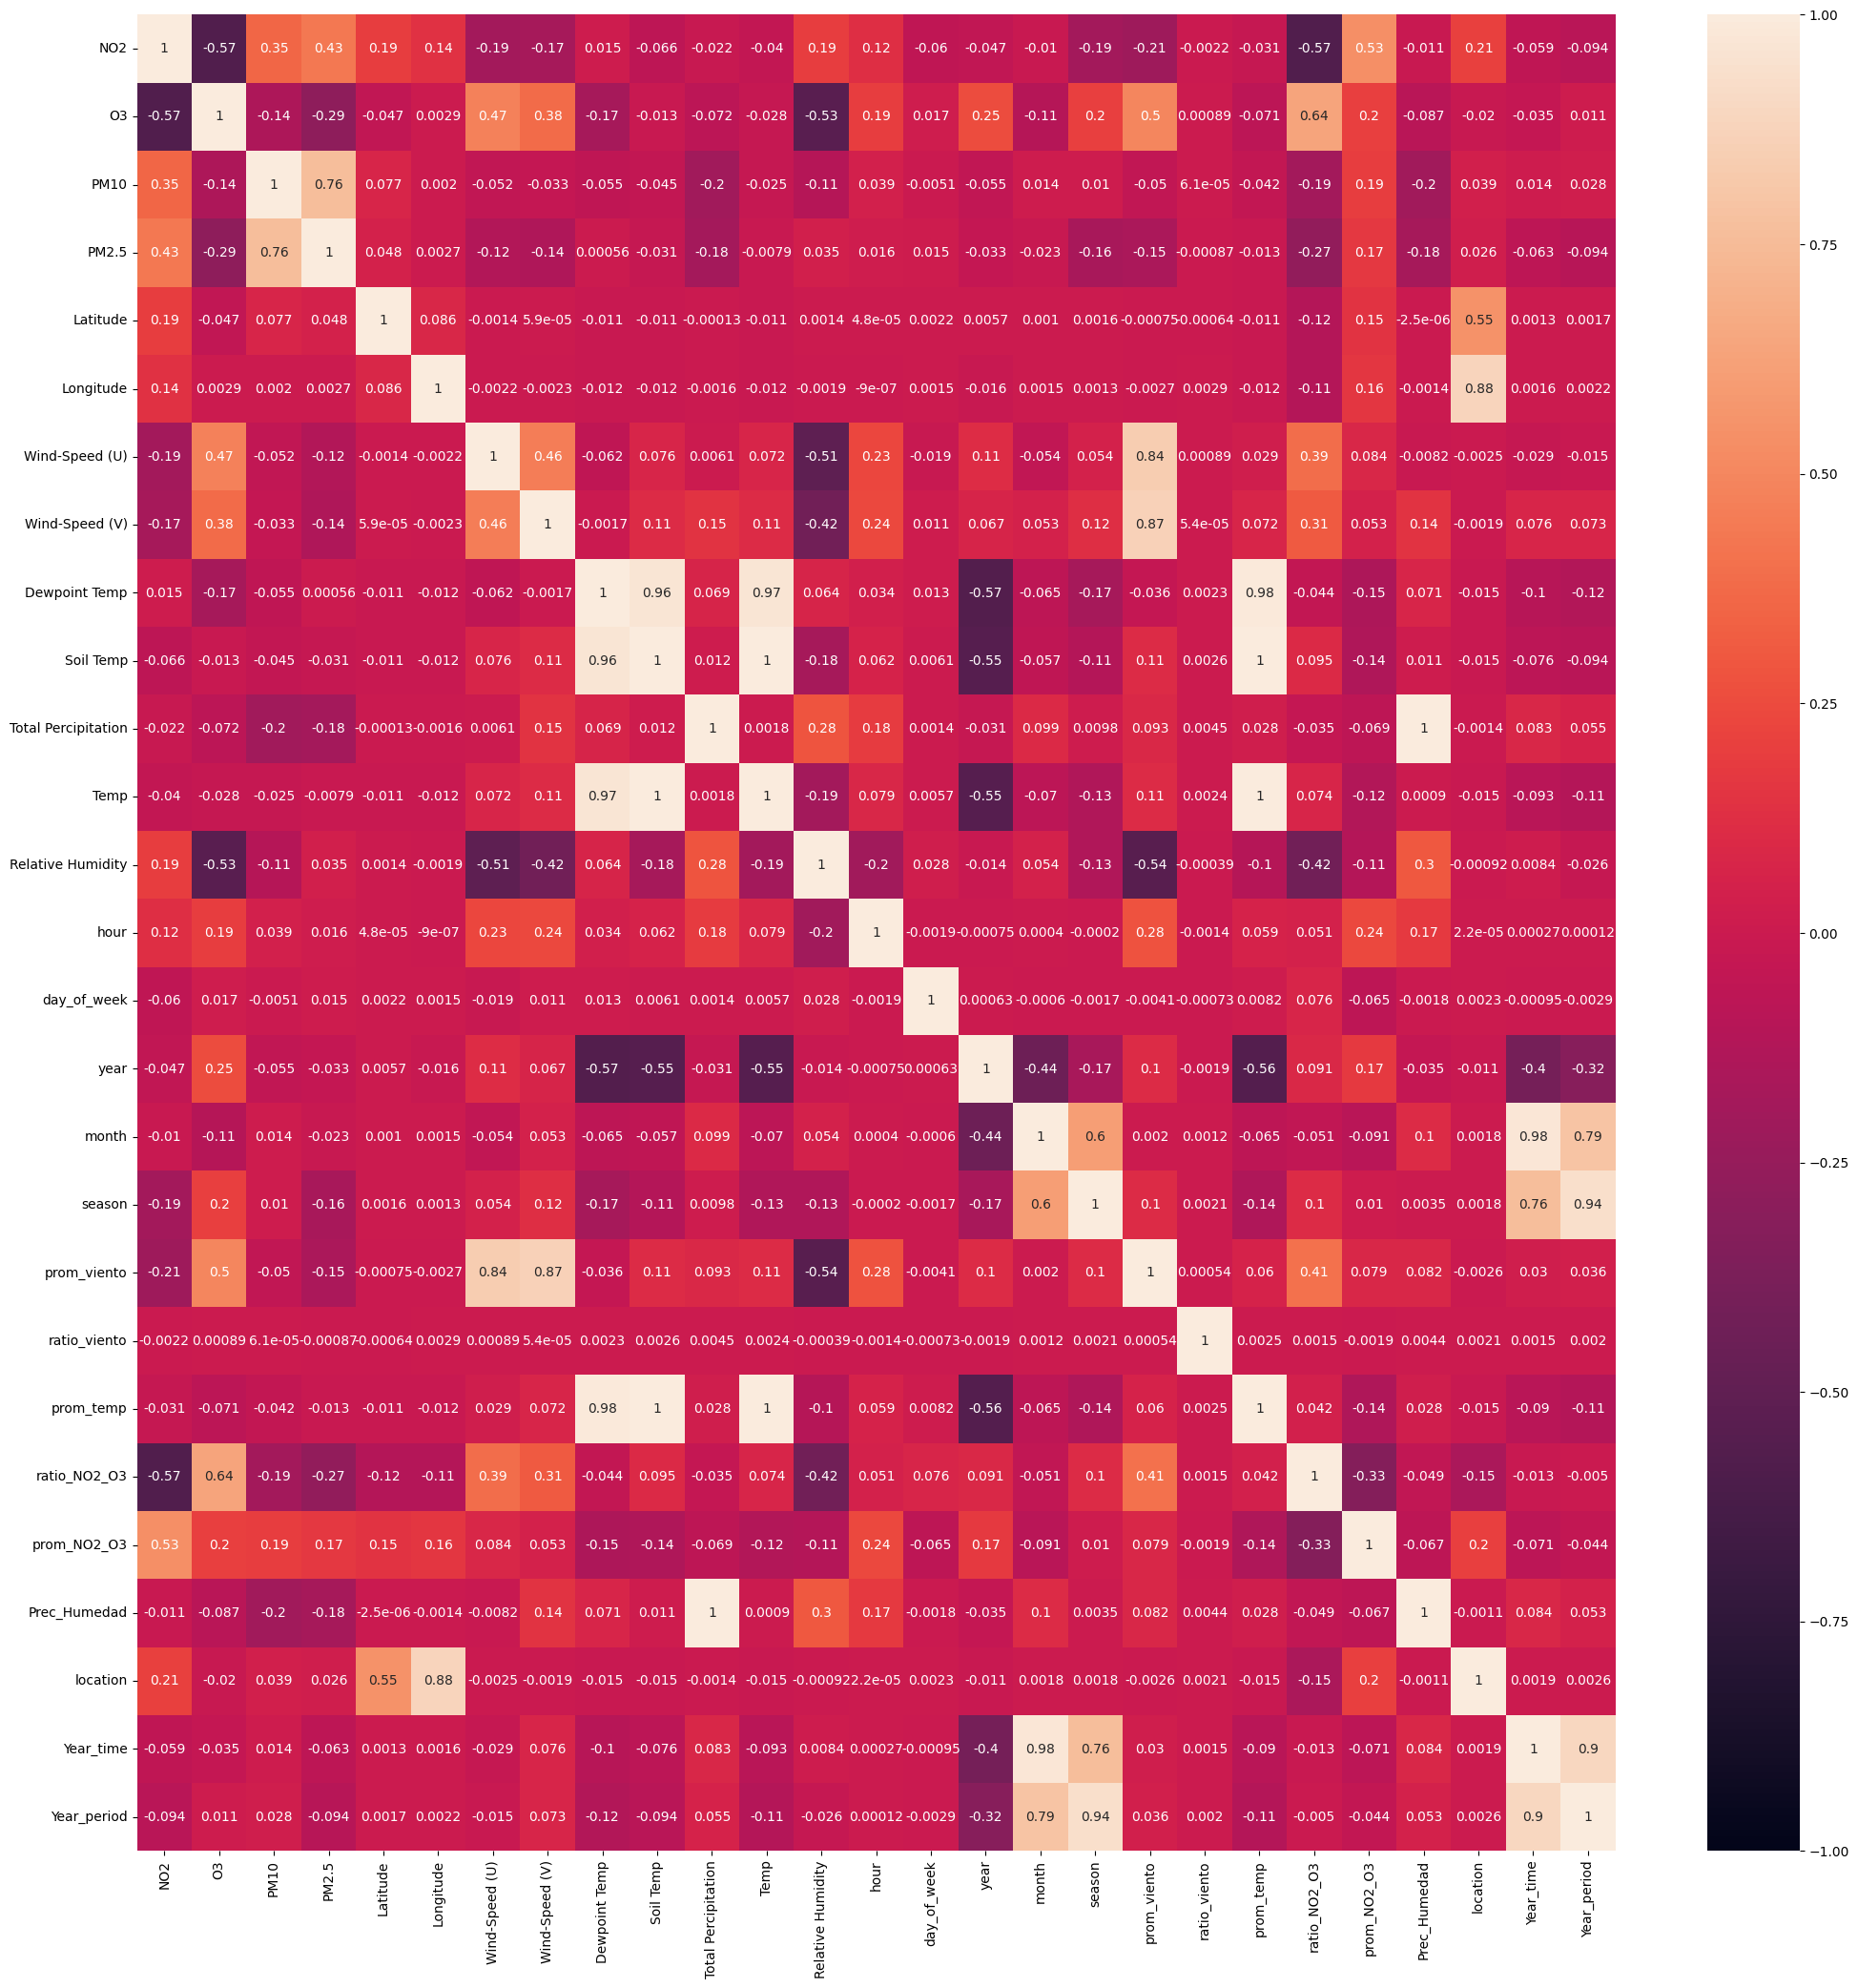

In [44]:
plt.figure(figsize=(25, 25))
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1)

In [46]:
from phik import phik_matrix

In [47]:
df2 = df

In [48]:
matrix_phik = df2.phik_matrix()

interval columns not set, guessing: ['NO2', 'O3', 'PM10', 'PM2.5', 'Latitude', 'Longitude', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Temp', 'Relative Humidity', 'hour', 'day_of_week', 'year', 'month', 'season', 'prom_viento', 'ratio_viento', 'prom_temp', 'ratio_NO2_O3', 'prom_NO2_O3', 'Prec_Humedad', 'location', 'Year_time', 'Year_period']


C:\Users\sebit\AppData\Roaming\Python\Python311\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\sebit\.conda\envs\kedro\Lib\site-packages\phik\phik.py:150: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binned.replace(defs.UF, np.nan, inplace=True)


<Axes: >

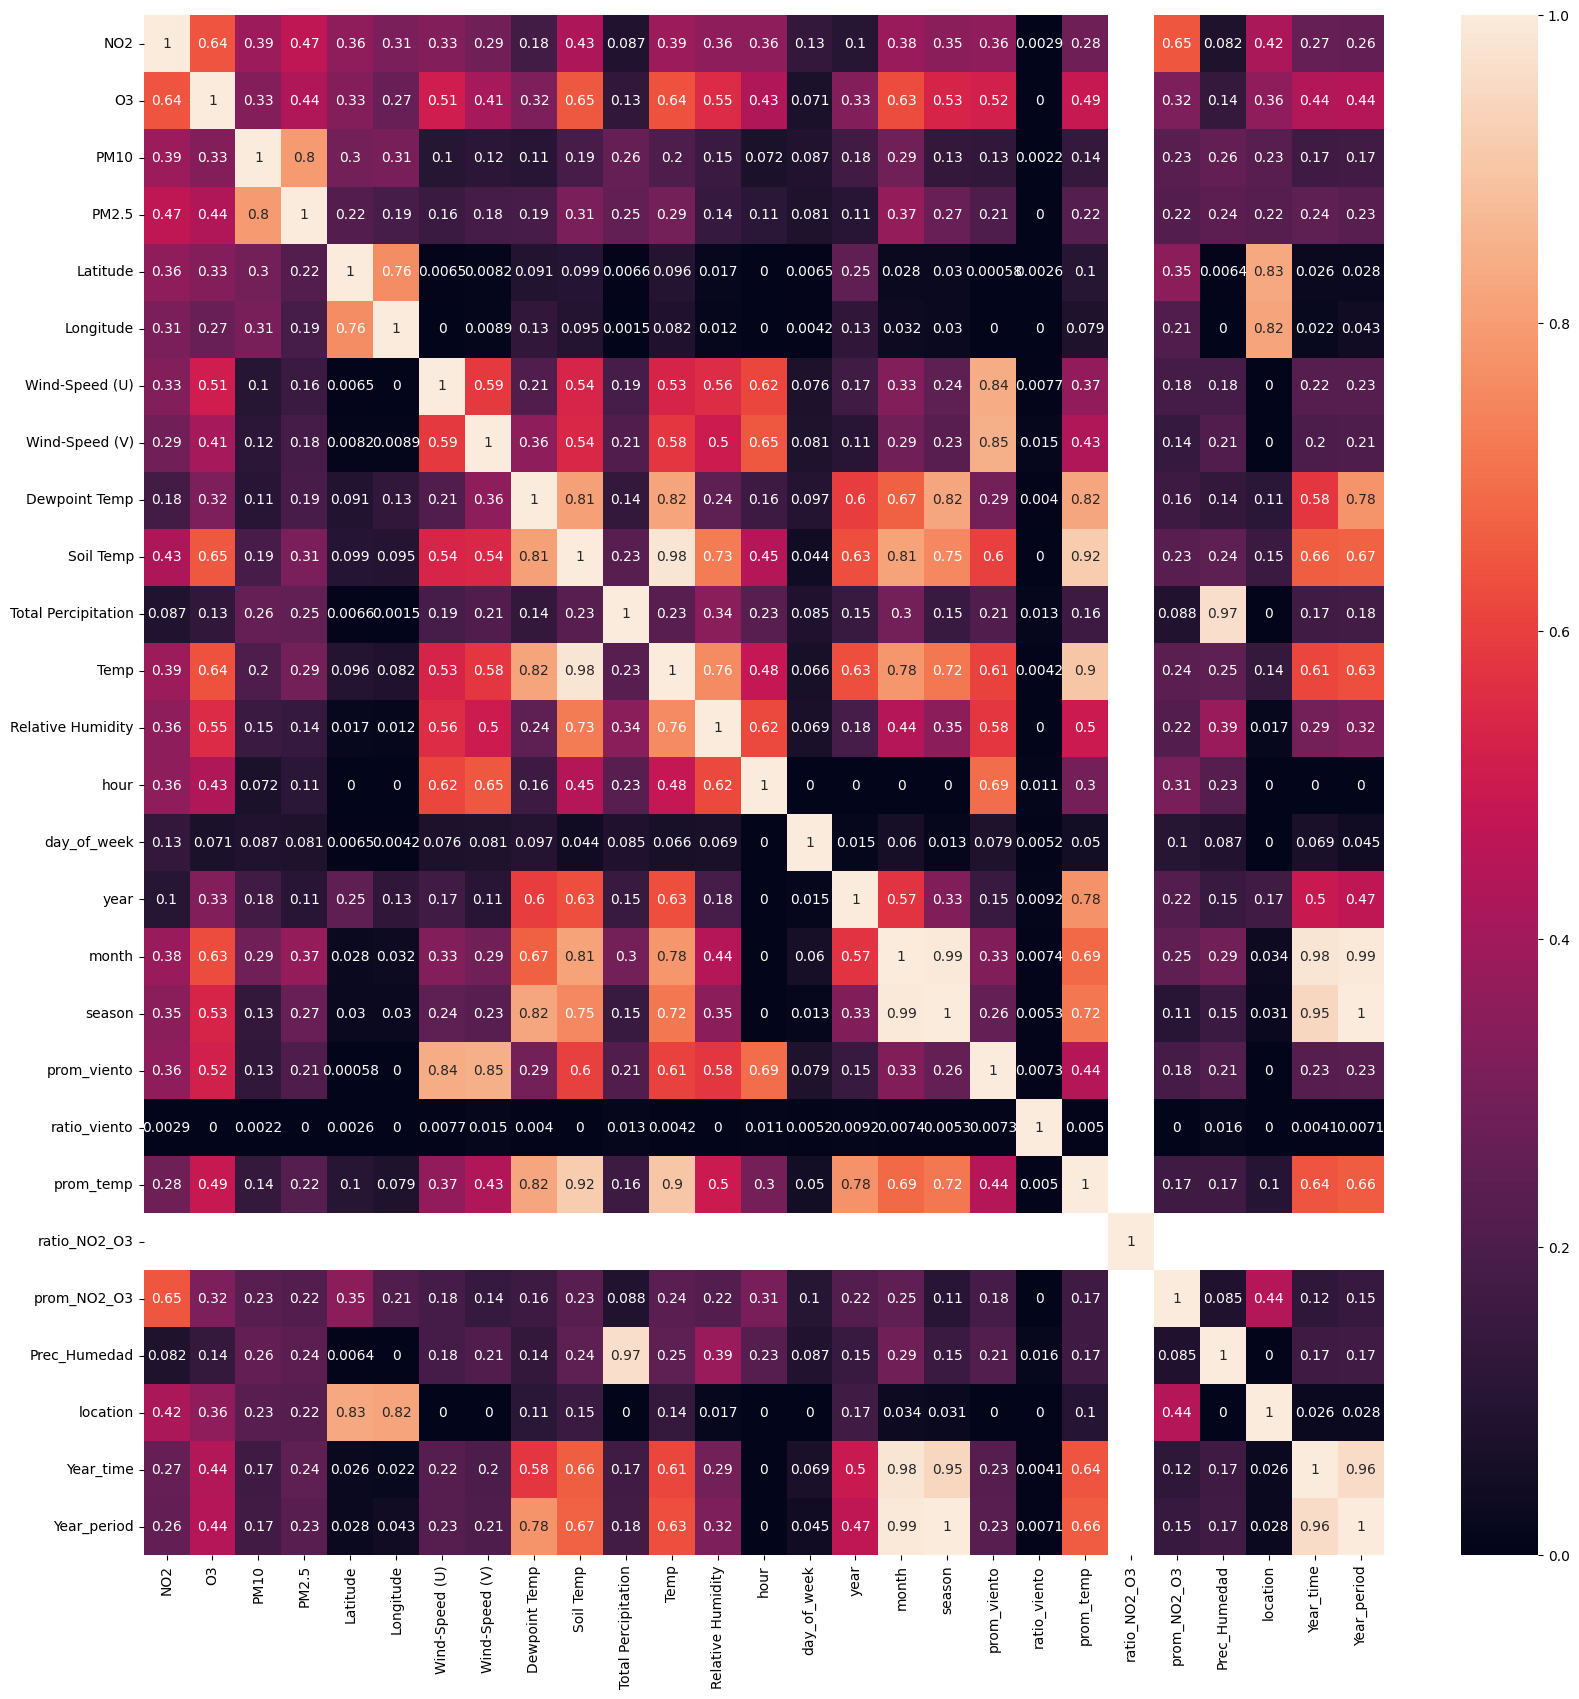

In [49]:
plt.figure(figsize=(20, 20))
sns.heatmap(matrix_phik, annot=True, vmin=0, vmax=1)

In [55]:
final_var_PM10 = list(matrix_phik.query("PM10 >= 0.25").index)
final_var_PM25 = list(matrix_phik.query("`PM2.5` >= 0.25").index)


In [56]:
final_var_PM10

['NO2',
 'O3',
 'PM10',
 'PM2.5',
 'Latitude',
 'Longitude',
 'Total Percipitation',
 'month',
 'Prec_Humedad']

In [57]:
final_var_PM25

['NO2',
 'O3',
 'PM10',
 'PM2.5',
 'Soil Temp',
 'Total Percipitation',
 'Temp',
 'month',
 'season']